# Question 1
# CIFAR 10 Dataset

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.optim as optim

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size =256

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


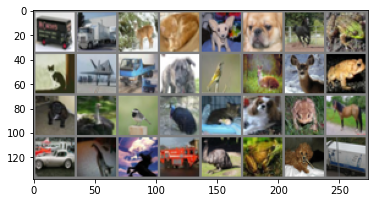

truck truck  deer   cat   dog   dog horse  frog   cat plane truck   dog  bird  deer  deer  frog   dog  bird  bird  bird   cat   dog  frog horse   car   cat horse truck  bird  frog   dog truck


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [ ]:
# SAMPLE CLASS
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


#Question 1
- 1
- 2

In [ ]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.zeropad = nn.ZeroPad2d(1)
        self.conv1 = nn.Conv2d(3, 16, 2)
        self.norm1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(16*16*16,10)

    def forward(self, x):
        x = self.zeropad(x)
        x = F.relu(self.conv1(x))
        x = self.norm1(x)
        x = self.pool(x)
        x = x.view(-1, 16 * 16 *16)
        x = self.fc1(x)
        return x

classifier = Classifier()
print(classifier)

Classifier(
  (zeropad): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
  (conv1): Conv2d(3, 16, kernel_size=(2, 2), stride=(1, 1))
  (norm1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=10, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=0.001)
classifier.train()
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

    
        optimizer.zero_grad()

      
        outputs = classifier(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

  
        running_loss += loss.item()
    running_loss /= len(trainloader)
    print("Epoch:{} {:.4f}".format(epoch+1,running_loss))

print('Finished Training')

Epoch:1 1.5169
Epoch:2 1.2233
Epoch:3 1.1178
Epoch:4 1.0546
Epoch:5 1.0136
Finished Training


In [ ]:
correct = 0
total = 0
classifier.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = classifier(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 59 %


#Question 1
## 3a

In [ ]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.zeropad = nn.ZeroPad2d(1)
        self.conv1 = nn.Conv2d(3, 16, 2)
        self.norm1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16*16*16,10)

    def forward(self, x):
        x = self.zeropad(x)
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = x.view(-1,  16 * 16 *16)
        x = self.fc1(x)
        return x

classifier = Classifier()
print(classifier)

Classifier(
  (zeropad): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
  (conv1): Conv2d(3, 16, kernel_size=(2, 2), stride=(1, 1))
  (norm1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=10, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=0.001)
classifier.train()
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

    
        optimizer.zero_grad()

      
        outputs = classifier(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

  
        running_loss += loss.item()
    running_loss /= len(trainloader)
    print("Epoch:{} {:.4f}".format(epoch+1,running_loss))

print('Finished Training')

Epoch:1 1.6387
Epoch:2 1.3385
Epoch:3 1.2521
Epoch:4 1.1993
Epoch:5 1.1636
Finished Training


In [ ]:
correct = 0
total = 0
classifier.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = classifier(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 58 %


#Question 1
##3b

In [ ]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.zeropad = nn.ZeroPad2d(2)
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.norm1 = nn.BatchNorm2d(6)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(6*16*16,64)
        self.fc2 = nn.Linear(64,10)

    def forward(self, x):
        x = self.zeropad(x)
        x = F.relu(self.conv1(x))
        x = self.norm1(x)
        x = self.pool(x)
        x = x.view(-1,  6 * 16 *16)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

classifier = Classifier()
print(classifier)

Classifier(
  (zeropad): ZeroPad2d(padding=(2, 2, 2, 2), value=0.0)
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (norm1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1536, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=0.001)
classifier.train()
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

    
        optimizer.zero_grad()

      
        outputs = classifier(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

  
        running_loss += loss.item()
    running_loss /= len(trainloader)
    print("Epoch:{} {:.4f}".format(epoch+1,running_loss))

print('Finished Training')

Epoch:1 1.4917
Epoch:2 1.1747
Epoch:3 1.0376
Epoch:4 0.9482
Epoch:5 0.8833
Finished Training


In [ ]:
correct = 0
total = 0
classifier.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = classifier(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 60 %


#Question 1
##3c

In [ ]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.zeropad = nn.ZeroPad2d(1)
        self.conv1 = nn.Conv2d(3, 16, 2)
        self.norm1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 2)
        self.norm2 = nn.BatchNorm2d(32)
        self.fc1 = nn.Linear(32*7*7,64)
        self.fc2 = nn.Linear(64,10)

    def forward(self, x):
        x = self.zeropad(x)
        x = F.relu(self.conv1(x))
        x = self.norm1(x)
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.norm2(x)
        x = self.pool(x)
        x = x.view(-1,  32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

classifier = Classifier()
print(classifier)

Classifier(
  (zeropad): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
  (conv1): Conv2d(3, 16, kernel_size=(2, 2), stride=(1, 1))
  (norm1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
  (norm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1568, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=0.001)
classifier.train()
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

    
        optimizer.zero_grad()

      
        outputs = classifier(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

  
        running_loss += loss.item()
    running_loss /= len(trainloader)
    print("Epoch:{} {:.4f}".format(epoch+1,running_loss))

print('Finished Training')

Epoch:1 1.3195
Epoch:2 0.9696
Epoch:3 0.8390
Epoch:4 0.7468
Epoch:5 0.6648
Finished Training


In [ ]:
correct = 0
total = 0
classifier.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = classifier(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 67 %


#Question 1
##3d

In [ ]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.zeropad = nn.ZeroPad2d(1)
        self.conv1 = nn.Conv2d(3, 16, 2)
        self.norm1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 2)
        self.norm2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 128, 2)
        self.norm3 = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(128*3*3,64)
        self.fc2 = nn.Linear(64,10)

    def forward(self, x):
        x = self.zeropad(x)
        x = F.relu(self.conv1(x))
        x = self.norm1(x)
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.norm2(x)
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.norm3(x)
        x = self.pool(x)
        x = x.view(-1,  128*3*3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

classifier = Classifier()
print(classifier)

Classifier(
  (zeropad): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
  (conv1): Conv2d(3, 16, kernel_size=(2, 2), stride=(1, 1))
  (norm1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
  (norm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 128, kernel_size=(2, 2), stride=(1, 1))
  (norm3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1152, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=0.001)
classifier.train()
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

    
        optimizer.zero_grad()

      
        outputs = classifier(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

  
        running_loss += loss.item()
    running_loss /= len(trainloader)
    print("Epoch:{} {:.4f}".format(epoch+1,running_loss))

print('Finished Training')

Epoch:1 1.3146
Epoch:2 0.9646
Epoch:3 0.8218
Epoch:4 0.7214
Epoch:5 0.6408
Finished Training


In [ ]:
correct = 0
total = 0
classifier.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = classifier(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 69 %


# Saving the model

In [ ]:
torch.save(classifier,'model.pt')